In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
import seaborn as sns
import plotly.express as px 

In [28]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']

In [29]:
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
    acoes_ex_df[acao]=yf.download(acao, start='2020-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [30]:
acoes_ex_df

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR3.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2020-01-02,19.200001,17.010000,48.240002,32.799999,53.799999,114.239998
2020-01-03,18.930000,17.219999,48.799999,31.990000,53.709999,113.800003
2020-01-06,19.020000,17.090000,48.330002,33.029999,53.000000,112.589996
2020-01-07,19.059999,16.650000,49.400002,32.580002,52.599998,112.239998
2020-01-08,18.969999,16.700001,49.900002,32.049999,52.119999,111.949997
...,...,...,...,...,...,...
2023-12-26,13.770000,11.790000,53.849998,39.200001,54.939999,129.649994
2023-12-27,13.840000,11.720000,53.740002,39.139999,54.860001,130.229996
2023-12-28,13.730000,11.620000,53.439999,38.980000,55.389999,130.389999


In [31]:
acoes_ex_df = acoes_ex_df.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV',
                                          'VIVT3.SA': 'VIVO', 'PETR3.SA': 'PETROBRAS',
                                          'BBAS3.SA': 'BANCO DO BRASIL', 'BOVA11': 'BOVESPA'})

In [32]:
acoes_ex_df.to_csv('acoes_ex.csv')

In [33]:
acoes_ex_df = pd.read_csv('acoes_ex.csv')
acoes_ex_df

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA11.SA
0,2020-01-02,19.200001,17.010000,48.240002,32.799999,53.799999,114.239998
1,2020-01-03,18.930000,17.219999,48.799999,31.990000,53.709999,113.800003
2,2020-01-06,19.020000,17.090000,48.330002,33.029999,53.000000,112.589996
3,2020-01-07,19.059999,16.650000,49.400002,32.580002,52.599998,112.239998
4,2020-01-08,18.969999,16.700001,49.900002,32.049999,52.119999,111.949997
...,...,...,...,...,...,...,...
990,2023-12-26,13.770000,11.790000,53.849998,39.200001,54.939999,129.649994
991,2023-12-27,13.840000,11.720000,53.740002,39.139999,54.860001,130.229996
992,2023-12-28,13.730000,11.620000,53.439999,38.980000,55.389999,130.389999
993,2024-01-02,13.710000,11.200000,52.619999,39.360001,54.759998,128.759995


In [34]:
acoes_ex_df.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA11.SA
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,14.814905,12.229146,45.606643,29.242603,37.025588,105.982362
std,1.595144,2.030715,4.367512,5.847170,7.205450,11.187472
min,11.030000,8.130000,35.660000,11.050000,22.129999,61.139999
25%,13.730000,10.790000,42.125000,25.535000,31.785001,100.134998
50%,14.710000,12.380000,45.200001,29.410000,34.700001,107.580002
75%,15.595000,13.340000,49.165001,33.855000,41.535000,113.475002
max,19.600000,18.430000,56.740002,41.560001,55.389999,130.389999


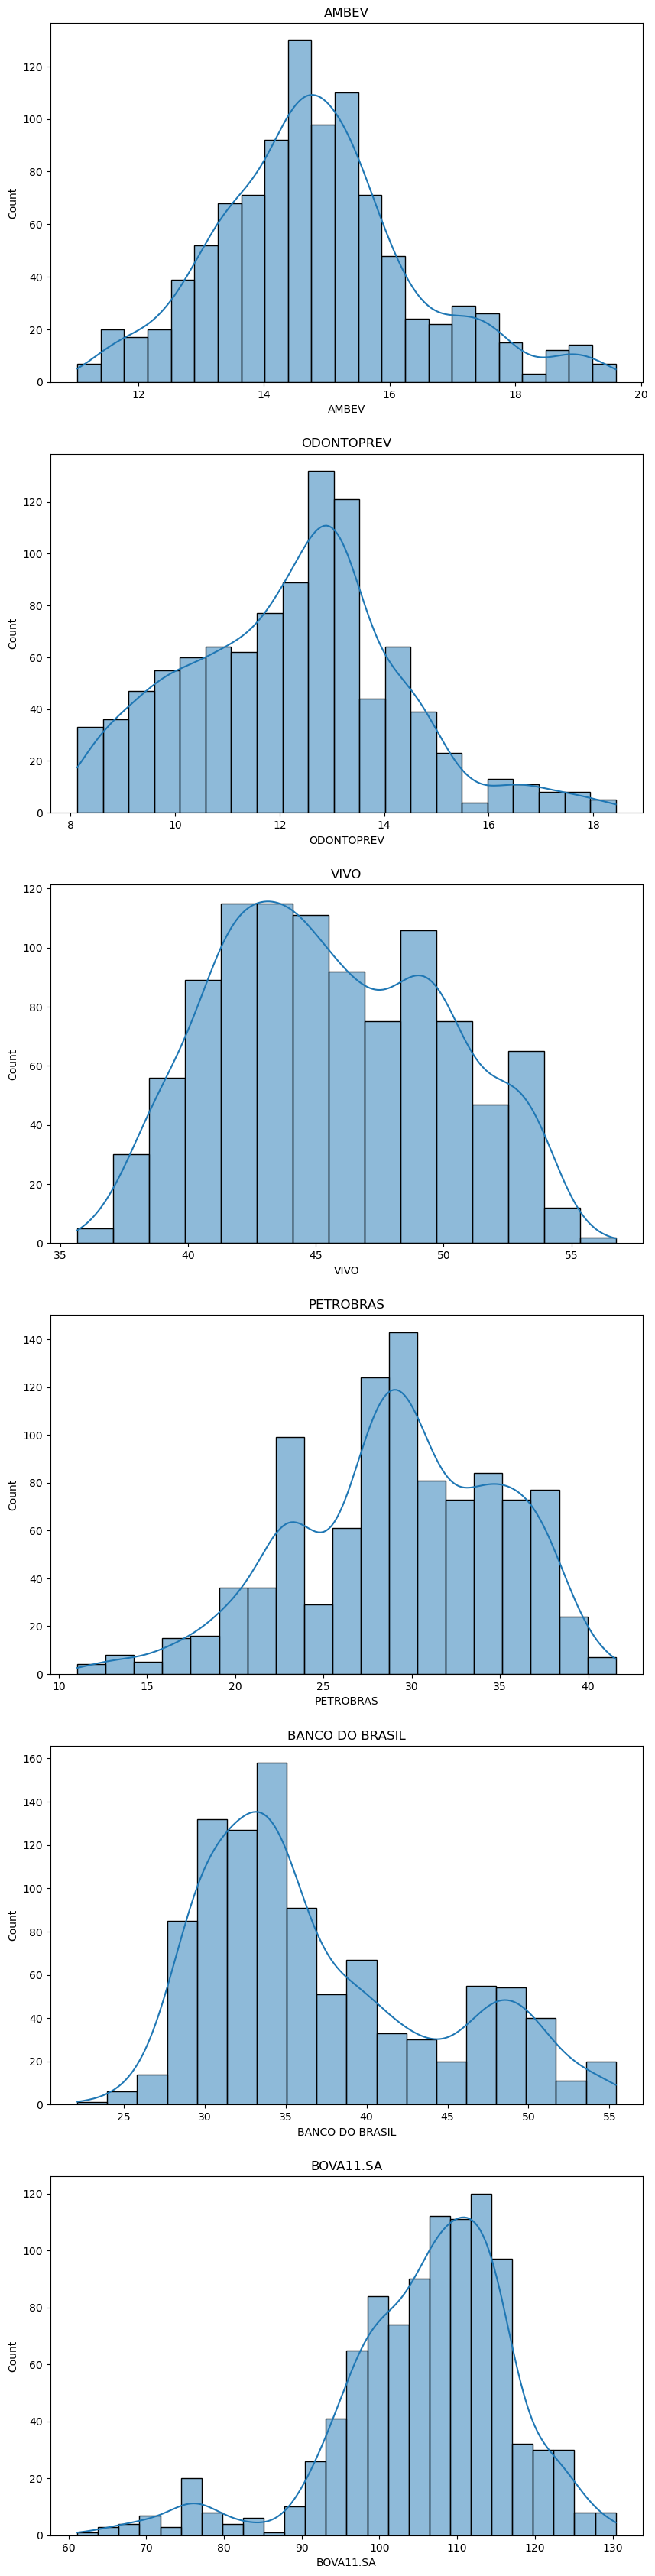

In [35]:
plt.figure(figsize=(10,50))
i=1
for i in np.arange(1, len(acoes_ex_df.columns)):
    plt.subplot(7, 1, i+1)
    sns.histplot(acoes_ex_df[acoes_ex_df.columns[i]], kde=True)
    plt.title(acoes_ex_df.columns[i])


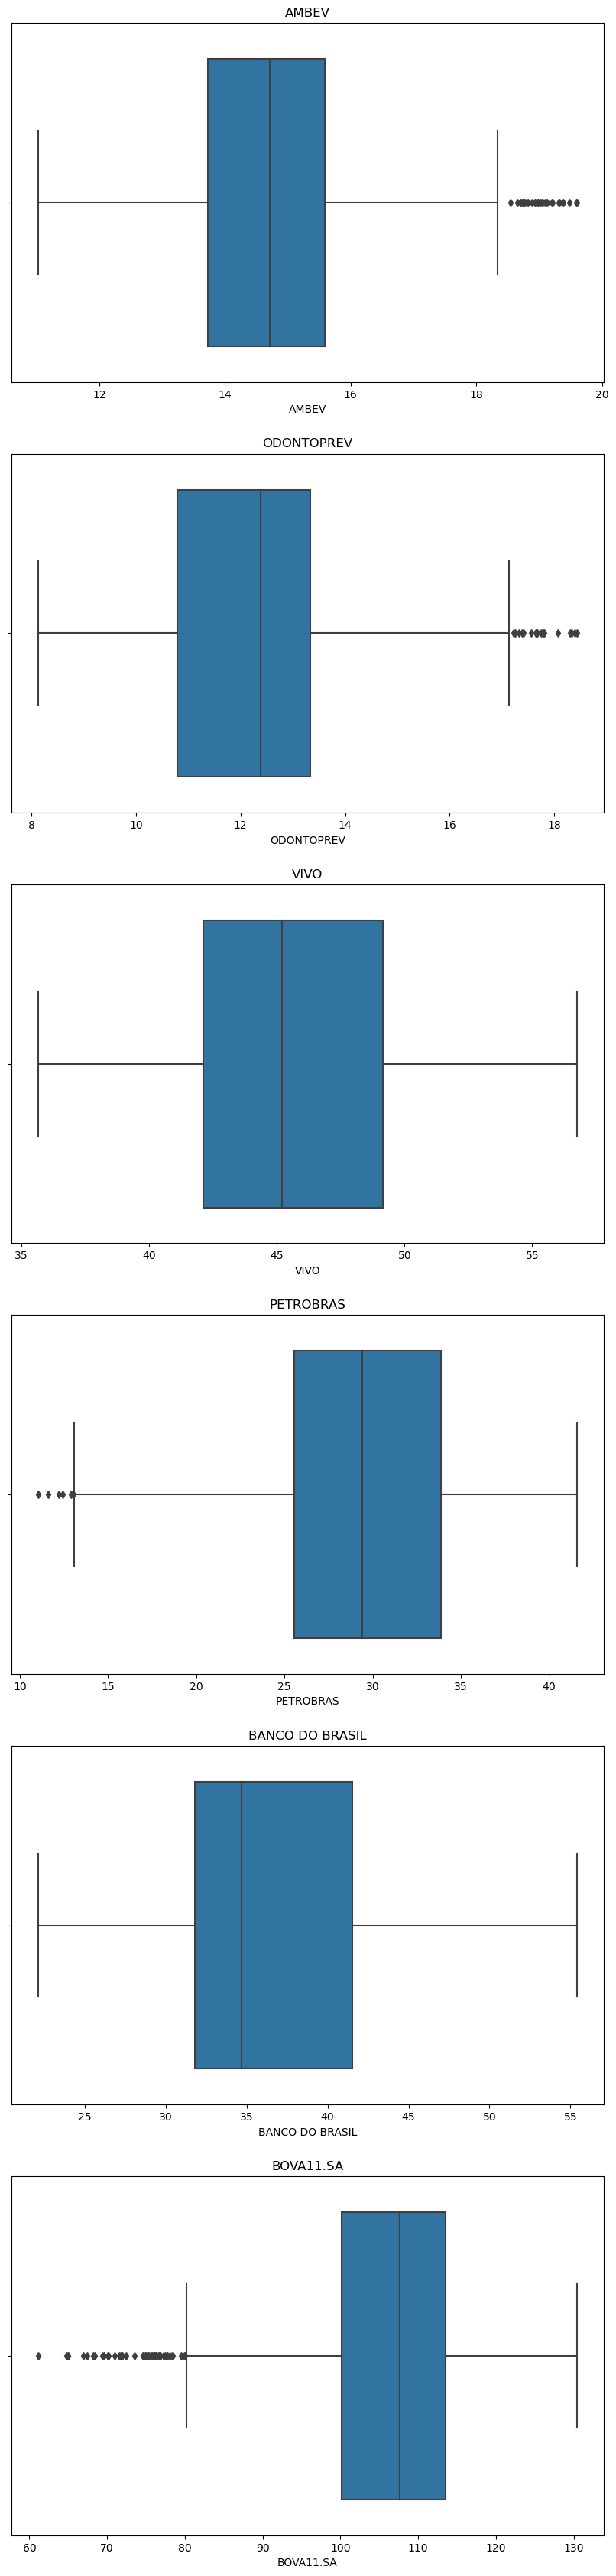

In [36]:
plt.figure(figsize=(10,50))
i=1
for i in np.arange(1, len(acoes_ex_df.columns)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(x=acoes_ex_df[acoes_ex_df.columns[i]])
    plt.title(acoes_ex_df.columns[i])
    

In [37]:
figura = px.line(title='Histórico do preço de ações')
for i in acoes_ex_df.columns[1:]:
    figura.add_scatter(x=acoes_ex_df['Date'], y=acoes_ex_df[i], name=i)
figura.show()

In [38]:
acoes_ex_df_normalizado = acoes_ex_df.copy()
for i in acoes_ex_df_normalizado.columns[1:]:
    acoes_ex_df_normalizado[i] = acoes_ex_df_normalizado[i]/ acoes_ex_df_normalizado[i][0]

In [39]:
acoes_ex_df_normalizado

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA11.SA
0,2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-01-03,0.985937,1.012346,1.011609,0.975305,0.998327,0.996149
2,2020-01-06,0.990625,1.004703,1.001866,1.007012,0.985130,0.985557
3,2020-01-07,0.992708,0.978836,1.024046,0.993293,0.977695,0.982493
4,2020-01-08,0.988021,0.981775,1.034411,0.977134,0.968773,0.979954
...,...,...,...,...,...,...,...
990,2023-12-26,0.717187,0.693122,1.116293,1.195122,1.021190,1.134891
991,2023-12-27,0.720833,0.689006,1.114013,1.193293,1.019703,1.139968
992,2023-12-28,0.715104,0.683128,1.107794,1.188415,1.029554,1.141369
993,2024-01-02,0.714062,0.658436,1.090796,1.200000,1.017844,1.127101


In [40]:
figura = px.line(title='Histórico do preço das ações - normaliozado')
for i in acoes_ex_df_normalizado.columns[1:]:
    figura.add_scatter(x=acoes_ex_df_normalizado['Date'], y = acoes_ex_df_normalizado[i], name = i)
figura.show()